In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [6]:
df = pd.read_csv(r"C:\Users\mohit\OneDrive\Desktop\DS\ML\L R\after_EDA_dataset.csv")

In [8]:
df.head()

,brand,price,reting,is_5g,is_nfc,is_ir_blaster,processor_brand,core,proccessor_speed,ram,internal_memory,battery_size,fast_charge,charging_speed,rear_mp,front_mp,os,display_size,refresh_rate
0,Samsung,74999,92.0,1,1.0,0,Snapdragon,8,3.30,12.0,256,5000,1,45,200,12,Android,6.80,120
1,Oneplus,24997,83.0,1,0.0,1,Dimensity,8,3.35,8.0,128,7100,1,80,50,16,Android,6.77,120
2,Apple,47999,81.0,1,1.0,0,Bionic,6,3.46,6.0,128,3349,1,20,48,12,iOS,6.10,60
3,Realme,16999,82.0,1,0.0,0,Dimensity,8,2.40,6.0,128,7000,1,60,50,50,Android,6.81,144
4,Samsung,33890,84.0,1,1.0,0,Exynos,10,3.11,8.0,128,4700,1,25,50,10,Android,6.70,120


In [99]:
class MeraLinearRegression:
    def __init__(self,lr=0.01, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.corf_ = None
        self.intercept_ = None
        self.mean_ = None
        self.std_ = None
        self.columns_ = None
        self.losses_ = []

    
    # Apply standardization formula
    def _standardScale(self,X,fit=False):
        if fit:
            self.mean_ = X.mean()
            self.std_ = X.std().replace(0,1)
            
        return (X-self.mean_)/self.std_

    # fit method
    def fit(self,X_train,y_train):
        # Convert categorical features into numerical using one-hot encoding
        X_train = pd.get_dummies(X_train,drop_first=True).astype(int)
        self.columns_ = X_train.columns

        X_train = self._standardScale(X_train,fit=True)
        
        # Convert DataFrame to NumPy array for fast computation
        X_train = X_train.values
        y_train = y_train.values

        # finding row and column
        row,col = X_train.shape

        self.corf_ = np.zeros(col)
        self.intercept_ = 0
        self.losses_ = []
        
        for i in range(self.epochs):
            y_pred = np.dot(X_train,self.corf_) + self.intercept_

            dw = (1/row) * np.dot(X_train.T,(y_pred - y_train))
            db = (1/row) * np.sum(y_pred - y_train)

            self.corf_ -= self.lr * dw
            self.intercept_ -= self.lr * db
            print("epochs ",i,"coeff :",self.corf_ ,"  ","intercet :",self.intercept_)

            #LOSS (MSE)
            loss = (1 / row) * np.sum((y_pred - y_train) ** 2)
            self.losses_.append(loss)

    
    #predict method
    def predict(self,X_test):
        X_test = pd.get_dummies(X_test,drop_first=True).astype(int)

        X_test = X_test.reindex(columns=self.columns_,fill_value=0)

        X_test = self._standardScale(X_test,fit=False)

        X_test = X_test.values
        return np.dot(X_test,self.corf_) + self.intercept_

In [101]:
X = df.drop(['price'],axis=1)
y = df['price']

In [103]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [105]:
LR1 = MeraLinearRegression()

In [107]:
LR1.fit(X_train,y_train)

epochs  0 coeff : [ 111.64049224   72.15977728  162.0409174   -19.62269997 -138.91178127
  198.3721157   175.1022818   229.13169084  -92.64832888   10.72641557
   11.45149547   80.50710862   31.97071561  148.81557392   30.27209004
  174.04792514  -11.30758514   51.88367429  -11.24876552   -7.87177219
  -28.6458529   -13.34193116  -35.73638059  -25.8819849    -3.94495605
   13.36877818  -19.63420517  -36.1882209   -45.28787435   61.70864538
  -15.56474252  -10.38602474  -40.30925079  -80.77972443    2.54497225
  -46.4876342    27.49016844   51.88367429   -8.58623447  -45.68850722
  174.04792514]    intercet : 320.33284722222226
epochs  1 coeff : [ 218.23671732  140.09864629  316.65056468  -39.01812286 -272.10694112
  388.66312219  343.2355649   450.19189612 -181.56092039   20.49023375
   21.3599812   158.17812194   61.59157666  293.88328142   59.43798729
  341.41454215  -22.11913653  101.81293521  -22.30936566  -15.88043581
  -56.37344023  -26.25613876  -68.74665882  -51.40868307   -8.4

In [109]:
y_pred = LR1.predict(X_test)

In [111]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7864824952391161
MAE: 7455.346718740932
RMSE: 10574.321685539928


Text(0.5, 1.0, 'Training Loss vs Epochs')

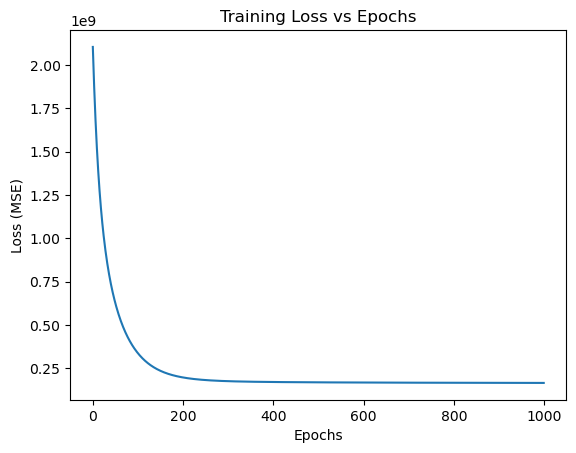

In [121]:
length = len(LR1.losses_)
plt.plot(range(length), LR1.losses_)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")

The training loss follows an exponential decay curve, indicating stable convergence of the model

log transform on output (y)


In [123]:
LR1.fit(X_train,np.log1p(y_train))

epochs  0 coeff : [ 2.94588225e-03  3.02809940e-03  4.33317304e-03  1.95355525e-04
 -2.40403518e-03  5.17722086e-03  5.13550611e-03  5.05187955e-03
 -1.43896946e-03  3.71713760e-04  2.24045871e-03  1.74613732e-03
  2.38048820e-03  2.23041117e-03  1.75059808e-03  3.20795305e-03
 -2.44265261e-04  1.23309732e-03 -3.64745124e-04 -8.72345517e-05
 -8.77897630e-04 -5.79377813e-05 -1.35001046e-03 -5.93596776e-04
  1.93778469e-04  8.14840174e-04 -1.06896840e-04 -1.11058873e-03
 -8.33547982e-04  1.15745743e-03 -4.87038529e-04  2.71018546e-04
 -1.19290552e-03 -1.43511834e-03  4.25843424e-04 -1.93058413e-03
  1.12494823e-03  1.23309732e-03 -3.56047739e-04 -2.15388710e-03
  3.20795305e-03]    intercet : 0.10059800484554364
epochs  1 coeff : [ 0.00574964  0.00591028  0.00847447  0.00036479 -0.00470738  0.01014173
  0.01005957  0.00989698 -0.0028309   0.00071145  0.00437874  0.00341653
  0.00465323  0.0043815   0.0034215   0.00629509 -0.00047602  0.00242028
 -0.00072211 -0.00017996 -0.00172755 -0.000

In [125]:
y_pred = LR1.predict(X_test)

In [127]:
y_pred = np.expm1(y_pred)

In [129]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.837236604918896
MAE: 5077.442108649593
RMSE: 9232.390075582061


Text(0.5, 1.0, 'Training Loss vs Epochs')

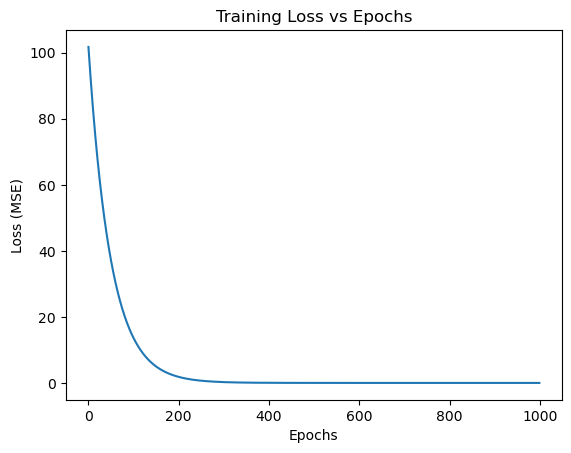

In [133]:
length = len(LR1.losses_)
plt.plot(range(length), LR1.losses_)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")

##  Side-by-side comparison

| Metric       | Old    | New        | 
| ------------ | ------ | ---------- | 
| **R² Score** | 0.7865 | **0.8372** | 
| **MAE**      | 7455   | **5077**   | 
| **RMSE**     | 10574  | **9232**   |

In [135]:
X = df.drop(['price','fast_charge','is_ir_blaster','charging_speed'],axis=1)
y = df['price']

In [137]:
lr = MeraLinearRegression()

In [139]:
lr.fit(X_train,y_train)

epochs  0 coeff : [ 111.64049224   72.15977728  162.0409174   -19.62269997 -138.91178127
  198.3721157   175.1022818   229.13169084  -92.64832888   10.72641557
   11.45149547   80.50710862   31.97071561  148.81557392   30.27209004
  174.04792514  -11.30758514   51.88367429  -11.24876552   -7.87177219
  -28.6458529   -13.34193116  -35.73638059  -25.8819849    -3.94495605
   13.36877818  -19.63420517  -36.1882209   -45.28787435   61.70864538
  -15.56474252  -10.38602474  -40.30925079  -80.77972443    2.54497225
  -46.4876342    27.49016844   51.88367429   -8.58623447  -45.68850722
  174.04792514]    intercet : 320.33284722222226
epochs  1 coeff : [ 218.23671732  140.09864629  316.65056468  -39.01812286 -272.10694112
  388.66312219  343.2355649   450.19189612 -181.56092039   20.49023375
   21.3599812   158.17812194   61.59157666  293.88328142   59.43798729
  341.41454215  -22.11913653  101.81293521  -22.30936566  -15.88043581
  -56.37344023  -26.25613876  -68.74665882  -51.40868307   -8.4

In [140]:
y_pred = lr.predict(X_test)

In [141]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.7864824952391161
MAE: 7455.346718740932
RMSE: 10574.321685539928


log transform on output

In [146]:
LR = MeraLinearRegression(epochs=2000)

In [148]:
LR.fit(X_train,np.log1p(y_train))

epochs  0 coeff : [ 2.94588225e-03  3.02809940e-03  4.33317304e-03  1.95355525e-04
 -2.40403518e-03  5.17722086e-03  5.13550611e-03  5.05187955e-03
 -1.43896946e-03  3.71713760e-04  2.24045871e-03  1.74613732e-03
  2.38048820e-03  2.23041117e-03  1.75059808e-03  3.20795305e-03
 -2.44265261e-04  1.23309732e-03 -3.64745124e-04 -8.72345517e-05
 -8.77897630e-04 -5.79377813e-05 -1.35001046e-03 -5.93596776e-04
  1.93778469e-04  8.14840174e-04 -1.06896840e-04 -1.11058873e-03
 -8.33547982e-04  1.15745743e-03 -4.87038529e-04  2.71018546e-04
 -1.19290552e-03 -1.43511834e-03  4.25843424e-04 -1.93058413e-03
  1.12494823e-03  1.23309732e-03 -3.56047739e-04 -2.15388710e-03
  3.20795305e-03]    intercet : 0.10059800484554364
epochs  1 coeff : [ 0.00574964  0.00591028  0.00847447  0.00036479 -0.00470738  0.01014173
  0.01005957  0.00989698 -0.0028309   0.00071145  0.00437874  0.00341653
  0.00465323  0.0043815   0.0034215   0.00629509 -0.00047602  0.00242028
 -0.00072211 -0.00017996 -0.00172755 -0.000

In [150]:
y_pred = LR.predict(X_test)

In [152]:
y_pred = np.expm1(y_pred)

In [154]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8415908671645327
MAE: 4963.064682144864
RMSE: 9108.060015597708


Text(0.5, 1.0, 'Training Loss vs Epochs')

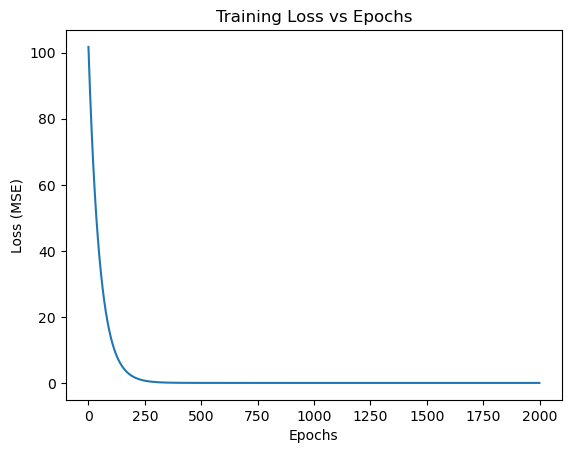

In [156]:
length = len(LR.losses_)
plt.plot(range(length), LR.losses_)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs Epochs")

### Now we apply inbuilt Linear Regression model

In [83]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [77]:
cat_cols = ['brand', 'processor_brand', 'os']

In [79]:
num_cols = [
    'reting','is_5g','core','is_nfc',
    'proccessor_speed','ram','internal_memory',
    'rear_mp','front_mp','battery_size','display_size','refresh_rate'
]

In [85]:
processor  = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols),
        ('cat',OneHotEncoder(drop='first'),cat_cols)
    ]
)

In [89]:
model1 = Pipeline(
    steps=[
        ('processor',processor),
        ('model',LinearRegression())
    ]
)

In [91]:
model1.fit(X_train,np.log1p(y_train))

,steps,"[('processor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [93]:
y_log_pred = model1.predict(X_test)

In [95]:
y_pred = np.expm1(y_log_pred)

In [97]:
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.8413744901456246
MAE: 4932.350036065437
RMSE: 9114.278414465318
